<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/train.csv')
test=pd.read_csv('/content/drive/MyDrive/test.csv')

# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



For each patient in the study the model should predict whether the patient has 10 year risk of coronary heart disease CHD or not. For that purpose, the target column will be 'TenYearCHD'. 


Visualize the target column

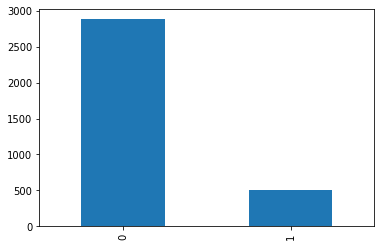

In [ ]:
#add your code
ds = train['TenYearCHD'].value_counts()
ds.plot.bar()

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [ ]:
#add your code
mv_tr = train.isnull().sum().reset_index()
mv_tr.columns = ['Column','Number of missing values']
mv_tr['% of missing values'] = mv_tr['Number of missing values']/len(train) *100
mv_tr

,Column,Number of missing values,% of missing values
0,id,0,0.000000
1,age,0,0.000000
2,education,87,2.566372
3,sex,0,0.000000
4,is_smoking,0,0.000000
5,cigsPerDay,22,0.648968
6,BPMeds,44,1.297935
7,prevalentStroke,0,0.000000
8,prevalentHyp,0,0.000000
9,diabetes,0,0.000000


In [ ]:
#in the test dataset
mv_te = test.isnull().sum().reset_index()
mv_te.columns = ['Column','Number of missing values']
mv_te['% of missing values'] = mv_te['Number of missing values']/len(test) *100
mv_te

,Column,Number of missing values,% of missing values
0,id,0,0.000000
1,age,0,0.000000
2,education,18,2.122642
3,sex,0,0.000000
4,is_smoking,0,0.000000
5,cigsPerDay,7,0.825472
6,BPMeds,9,1.061321
7,prevalentStroke,0,0.000000
8,prevalentHyp,0,0.000000
9,diabetes,0,0.000000


Visualize the missing values using Missingno library

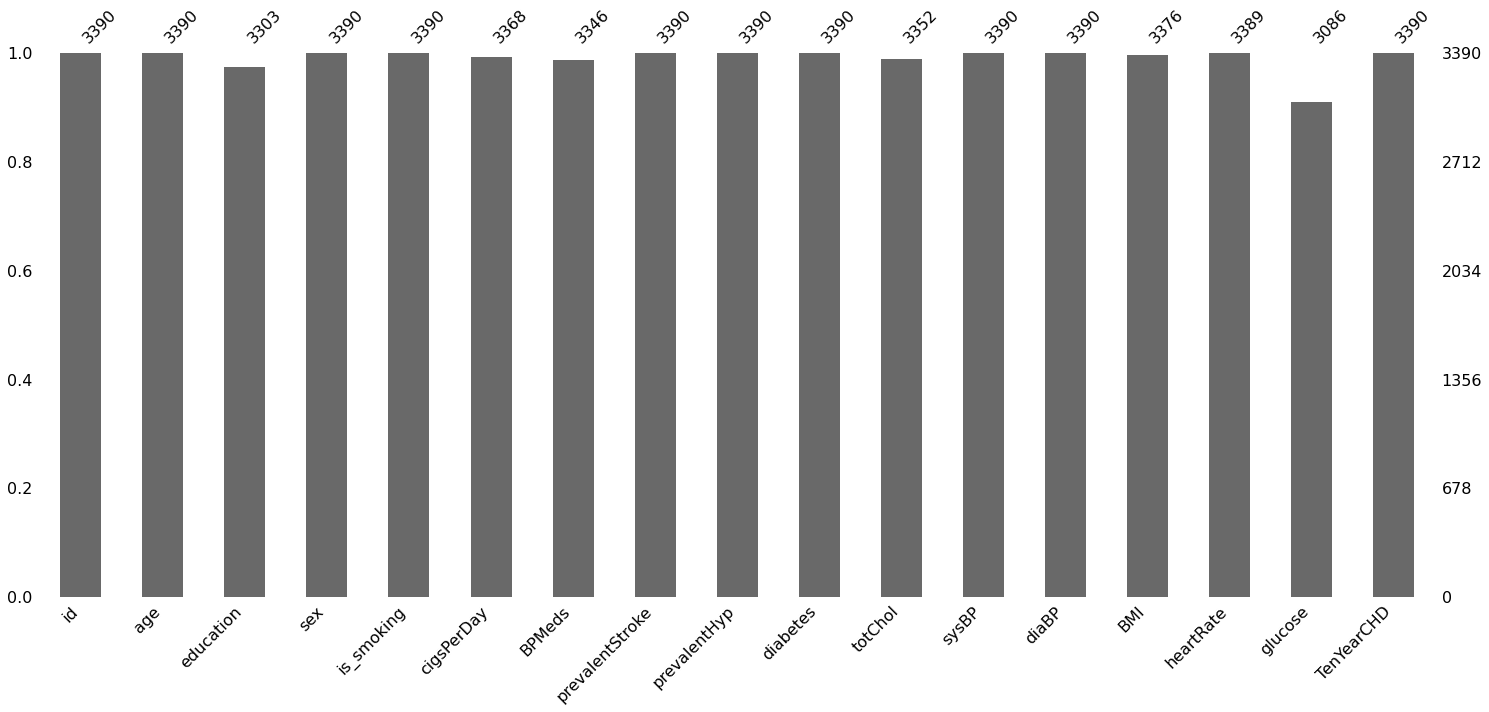

In [ ]:
import missingno as msno
msno.bar(train)

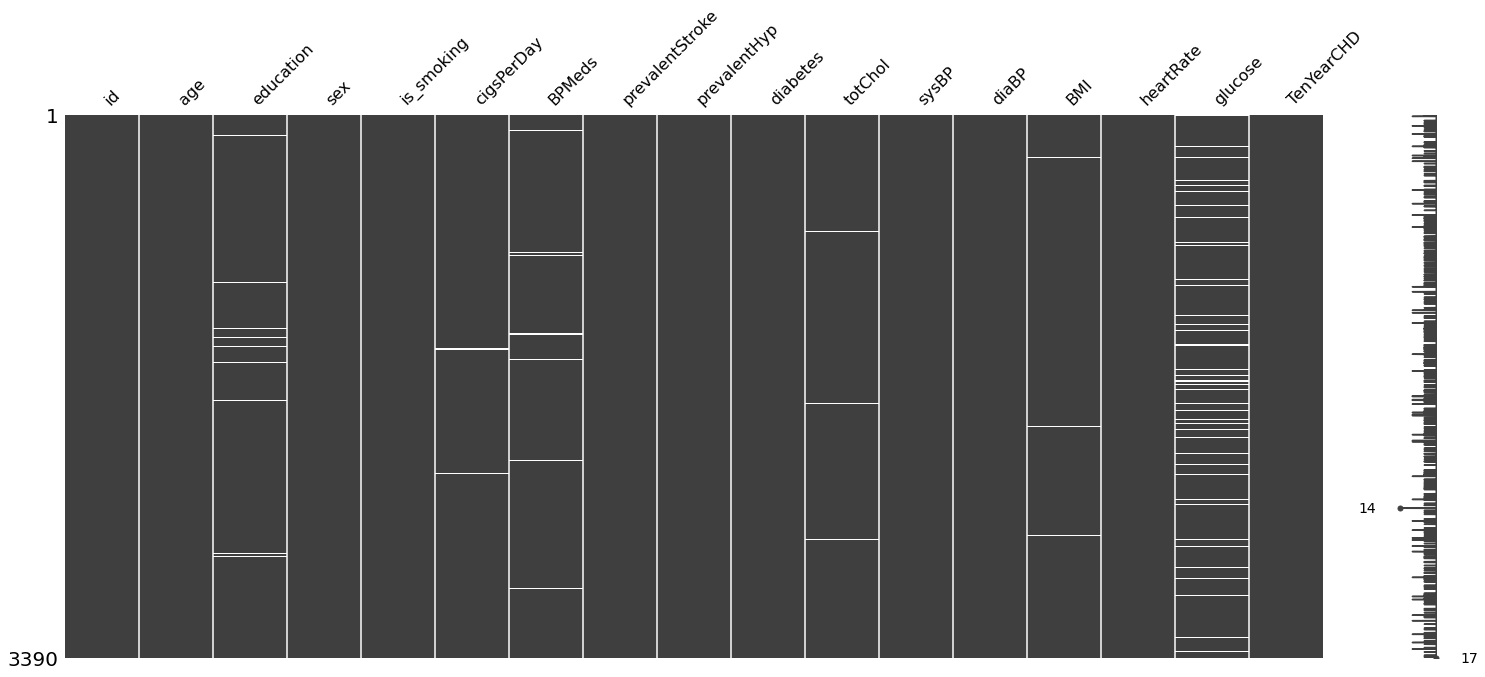

In [ ]:
msno.matrix(train)

## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

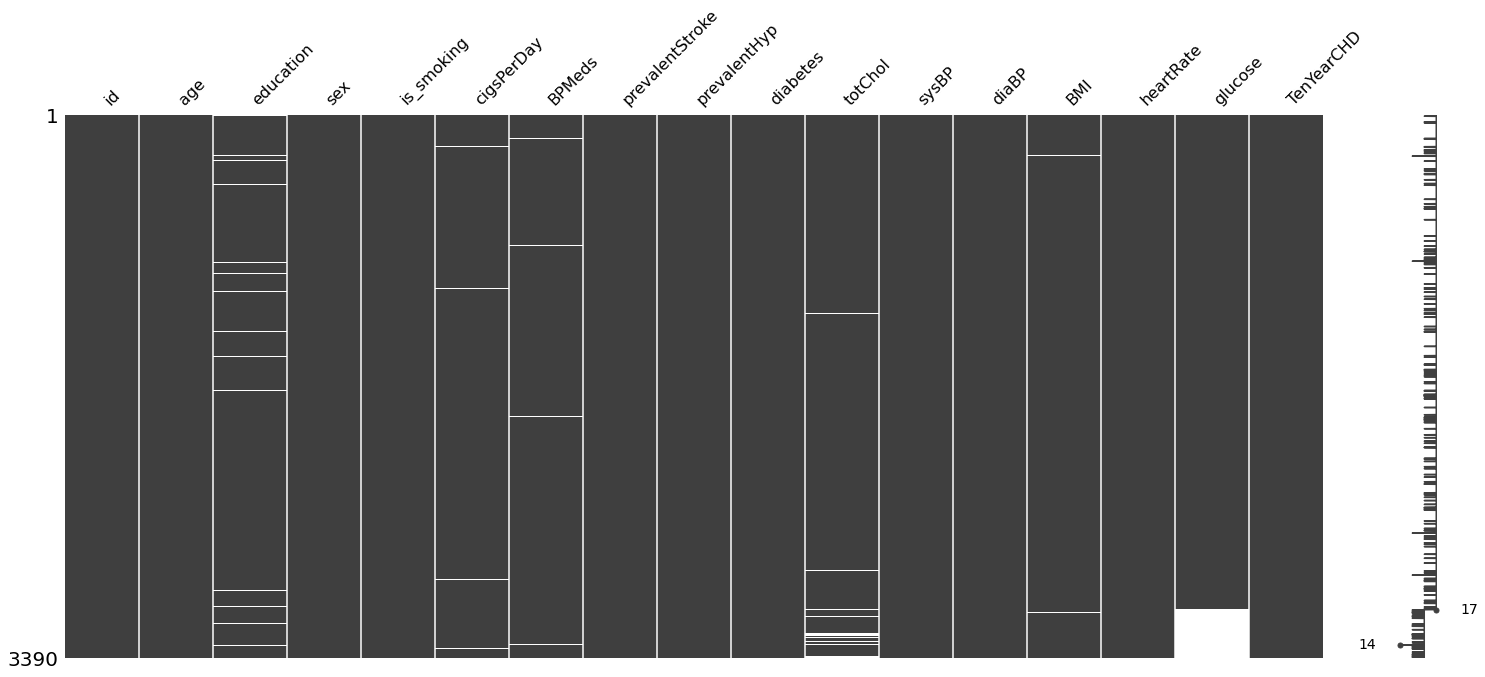

In [ ]:
msno.matrix(train.sort_values('glucose'))


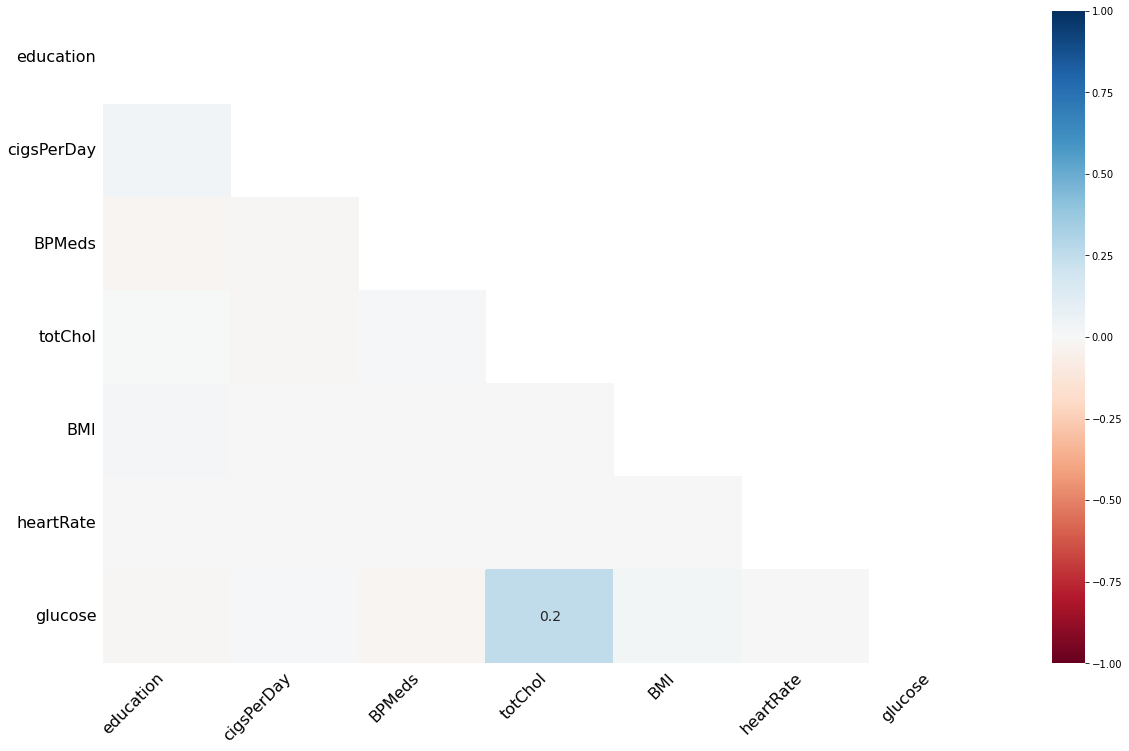

In [ ]:
msno.heatmap(train)

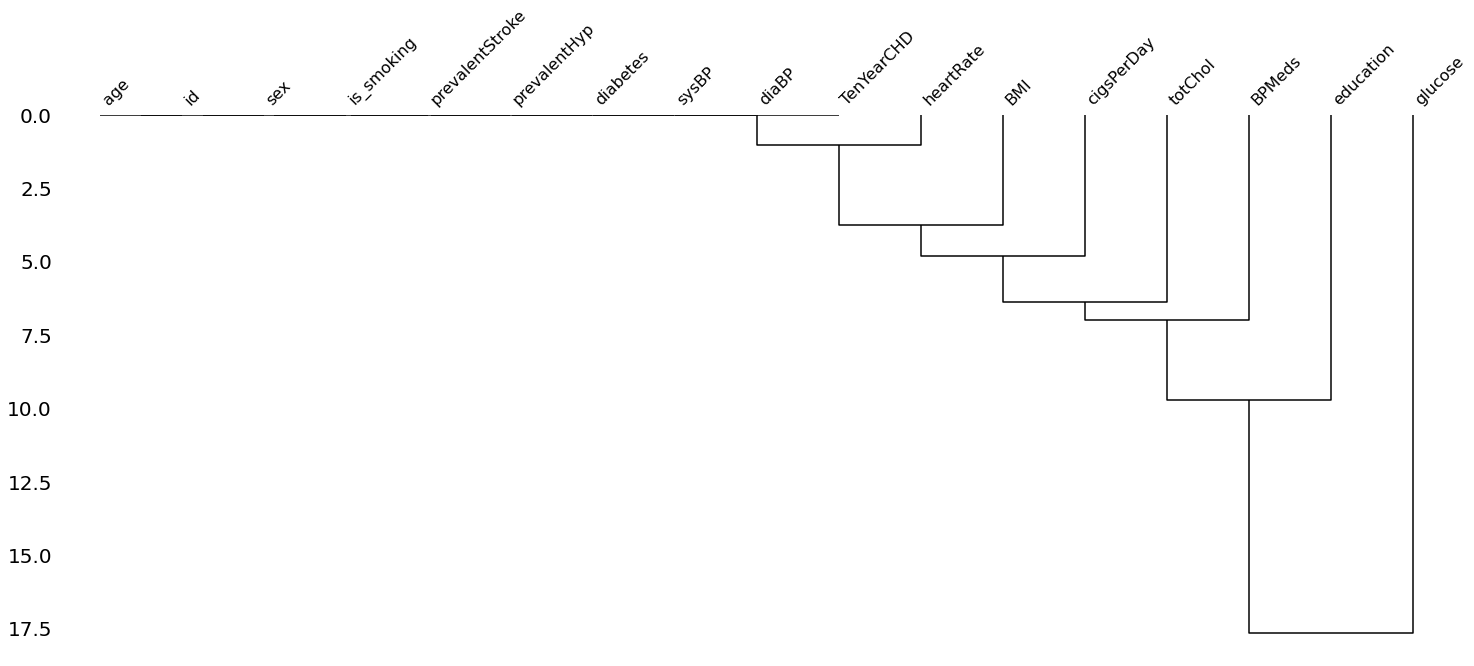

In [ ]:
msno.dendrogram(train)

Write the reasons for the missing values

As we can see from the heatmap, there is very little correlation between the missing values in the dataset, the highest value is 0.2, which not enough to conclude that they are related. The heatmap and dendogram suggest that the values are MCAR.

## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [ ]:
from sklearn.preprocessing import LabelEncoder 
copy = train.copy()
le = LabelEncoder() 
copy['sex']= le.fit_transform(copy['sex']) 

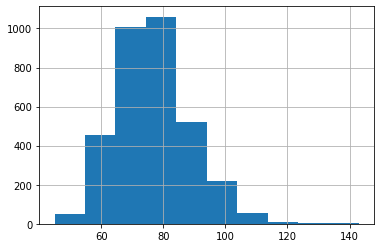

In [ ]:
train['heartRate'].hist(bins=10)

In [ ]:
#add your code
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['cigsPerDay'] = mice_imputer.fit_transform(train_mice[['cigsPerDay']])
train_mice['BPMeds'] = mice_imputer.fit_transform(train_mice[['BPMeds']])
train_mice['totChol'] = mice_imputer.fit_transform(train_mice[['totChol']])
train_mice['BMI'] = mice_imputer.fit_transform(train_mice[['BMI']])
train_mice['glucose'] = mice_imputer.fit_transform(train_mice[['glucose']])
train_mice['heartRate'] = mice_imputer.fit_transform(train_mice[['heartRate']])
train_mice['education'] = mice_imputer.fit_transform(train_mice[['education']])
train_mice.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [ ]:
#add your code
train_mice.to_csv('/content/drive/MyDrive/ds_train.csv', index=False)

Print the first rows of your final Dataset

In [ ]:
#add your code
train_mice.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

In [ ]:
#add your code
train_mice.mean()

In [ ]:
train_mice.median()

In [ ]:
train_mice.std()

In [ ]:
train_mice.min()

In [ ]:
train_mice.max()

In [ ]:
train_mice.quantile([.1, .25, .5, .75], axis = 0) 

In [ ]:
from scipy import stats

stats.gmean(train_mice.iloc[:,11:14],axis=0)

array([130.88346893,  82.04301384,  25.48774567])

## <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [ ]:
#add your code
train_mice['education'].value_counts()

In [ ]:
train_mice['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [ ]:
train_mice['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


add your answer here
I choose the columns 'heartRate', 'totChol' and 'glucose'

**Make the visualizations using histograms, bar charts, etc.**

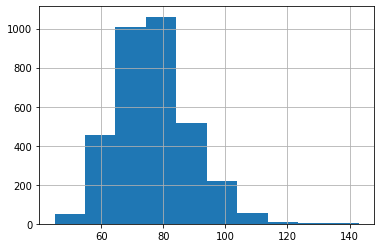

In [ ]:
#add your code
train_mice['heartRate'].hist(bins=10)

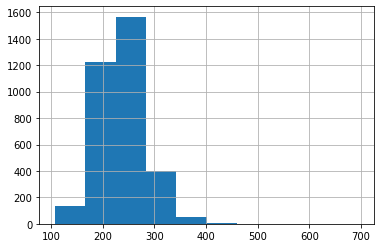

In [ ]:
train_mice['totChol'].hist(bins=10)

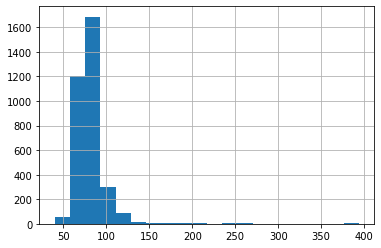

In [ ]:
train_mice['glucose'].hist(bins=20)


Add as many codeboxes as you need

## <font color = 'Orange'>Visualize the relationship between the attributes</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c11113890>,
      dtype=object)

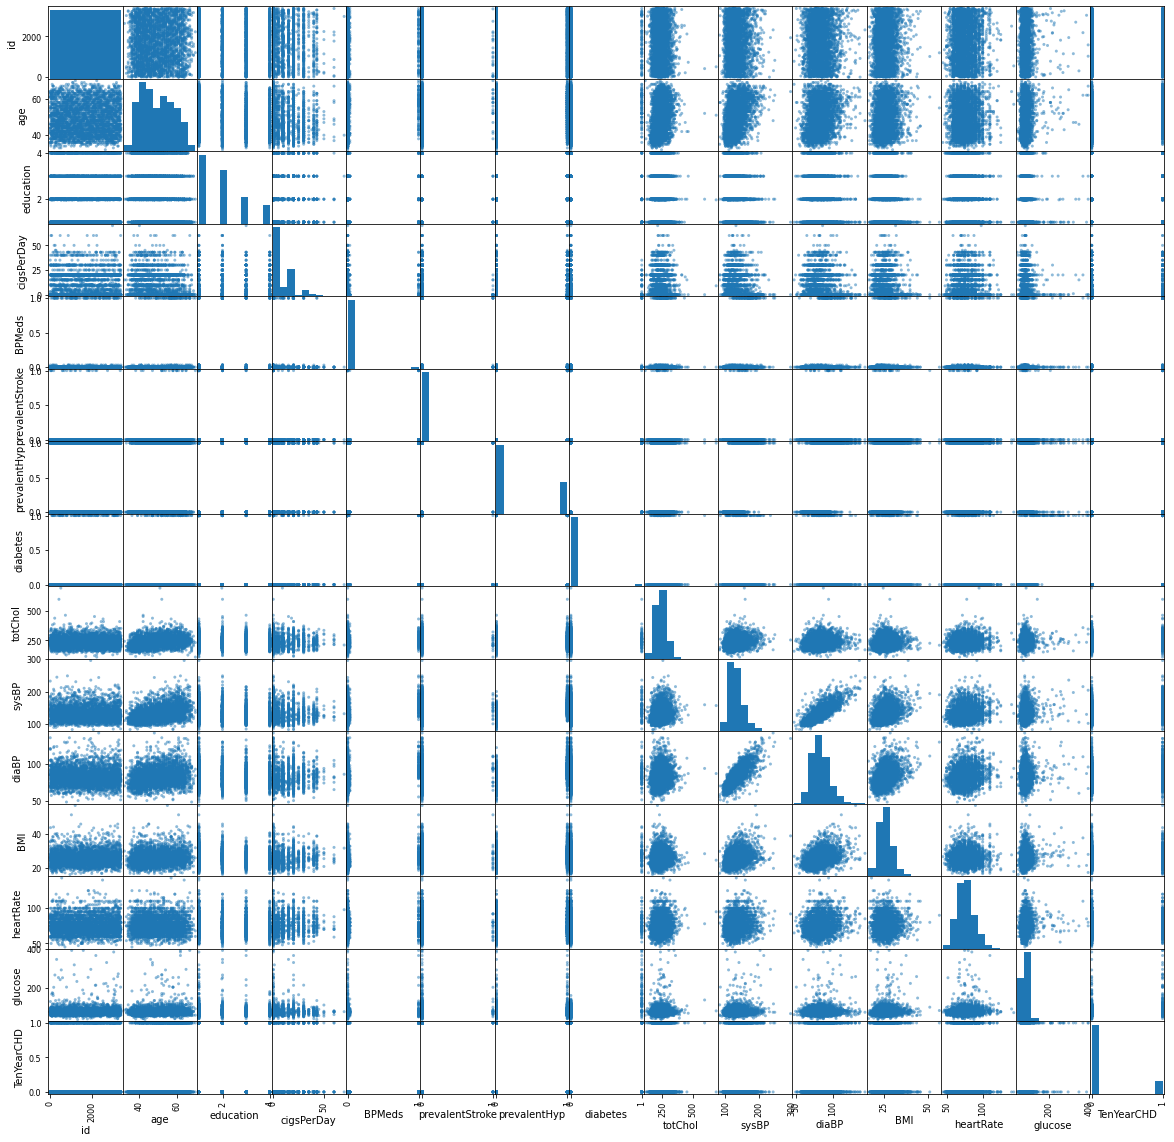

In [ ]:
#add your code 
from pandas.plotting import scatter_matrix
scatter_matrix(train_mice,figsize=(20, 20))

## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


In [ ]:
#add your code 
import matplotlib.pyplot as plt
import seaborn as sns

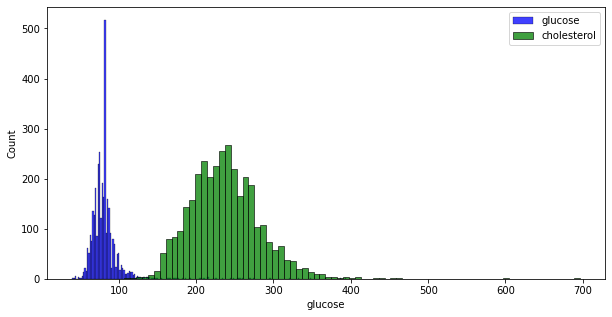

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(train_mice['glucose'], color='blue', label='glucose')
sns.histplot(train_mice['totChol'], color='green', label='cholesterol')

plt.legend()

In [ ]:
import plotly.express as px

fig = px.bar(
    train_mice, 
    x='age', 
    y="education", 
    color = 'sex',
    barmode='group',
    orientation='v', 
    title='education level', 
    width=800,
    height=700
)
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowladge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash



In [ ]:
!pip install jupyter-plotly-dash

In [ ]:
!pip install jupyter-dash

In [ ]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

import pandas as pd

In [ ]:
df['age'].unique()

array([64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 51, 56, 42, 38, 63, 35,
       54, 62, 47, 34, 39, 59, 45, 49, 60, 40, 52, 48, 37, 65, 57, 68, 67,
       33, 66, 69, 70, 32])

In [ ]:
marks1 = {str(Age): str(Age) for Age in df['cigsPerDay'].unique().tolist()}
marks1.values

<function dict.values>

In [ ]:
app = Dash(__name__)
l = df['age'].unique()

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        min=df['age'].min(),
        max=df['age'].max(),
        step=None,
        value=df['age'].min(),
        marks={str(Age): str(Age) for Age in df['age'].unique()},
        id='input'
    )
])


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ds_train.csv')


@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('input', 'value'))
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]

    fig = px.scatter(filtered_df, x="age", y="heartRate",
                     size="pop", color="education", hover_name="educationLevel",
                     log_x=True, size_max=55)

    fig.update_layout(transition_duration=500)

    return fig


if __name__ == '__main__':
    app.run_server(debug=True)